In [9]:
import pandas as pd 
import numpy as np


In [11]:
file_path = '/Users/vishaldadwal/Downloads/diabetes.csv'


In [143]:
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [115]:
#checking for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [117]:
#checking for duplicates
df.duplicated().sum()


0

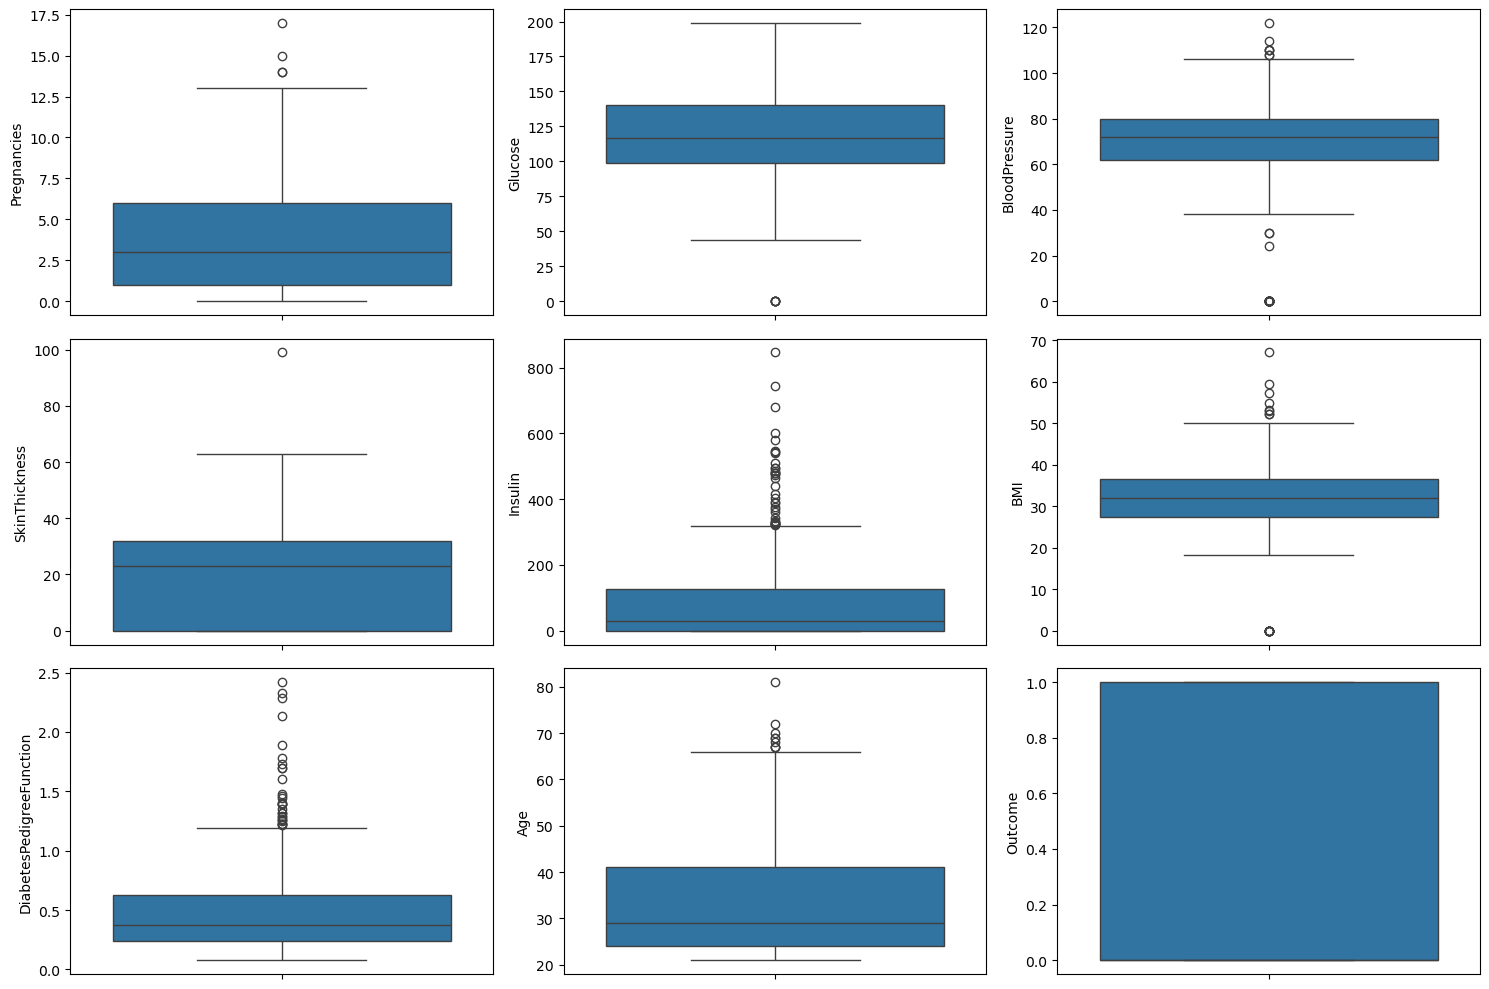

In [119]:
#the data is in desired form and there are no duplicates nor missing values 

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    plt.tight_layout()
plt.show()    
    

In [121]:
#removing outliers 
#outliers - Outliers are data points that significantly differ from the majority of the data in a dataset.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.columns:
    df=remove_outliers(df,col)




In [123]:
#Feature Engineering


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [145]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [147]:
tdf=df.copy()
tdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [149]:
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

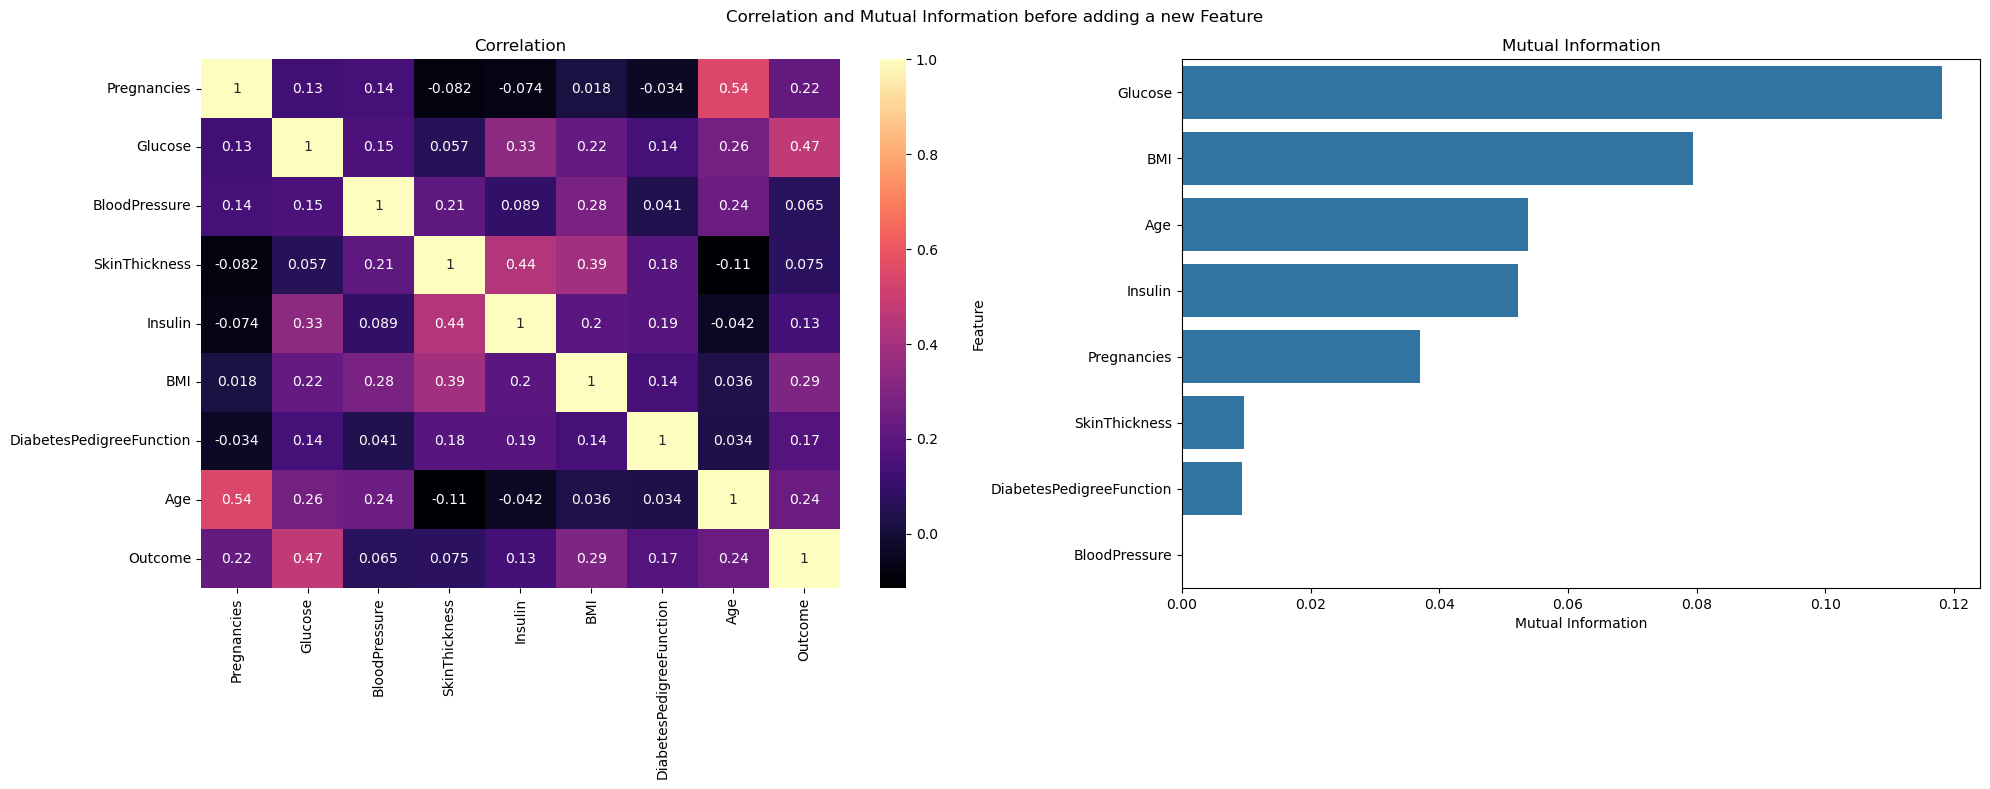

In [151]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

In [153]:
from sklearn.model_selection import train_test_split

In [155]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [157]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20) 

MODELS
1. Logistic Regression

In [159]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [170]:

cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

In [172]:
reg = LogisticRegression(max_iter=10000)
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nreg.fit(x_t,y_t)
print(nreg.best_params_)
print(nreg.best_score_)


{'solver': 'liblinear', 'penalty': 'l2', 'C': 8}
0.7759528130671507


In [173]:
nreg=nreg.best_estimator_
predt1=nreg.predict(x_t)
pred1=nreg.predict(x_te)

In [174]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

2. Random Forest 


In [178]:
rf=RandomForestClassifier(class_weight ='balanced')
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 1000, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': 'log2', 'criterion': 'entropy'}
0.7811252268602541


In [180]:
nrf=nrf.best_estimator_
predt4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [186]:
cr.append(classification_report(y_te,pred4))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4))
p.append(precision_score(y_te,pred4))
r_t.append(recall_score(y_t,predt4))
r.append(recall_score(y_te,pred4))
f1_t.append(f1_score(y_t,predt4))
f1.append(f1_score(y_te,pred4))

3 ADaBoost


In [191]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01)}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 1000, 'learning_rate': 0.62}
0.7603145795523291


In [192]:
nada=nada.best_estimator_
predt5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [193]:
cr.append(classification_report(y_te,pred5))
cm_t.append(confusion_matrix(y_t,predt5))
cm.append(confusion_matrix(y_te,pred5))
acc_t.append(accuracy_score(y_t,predt5))
acc.append(accuracy_score(y_te,pred5))
p_t.append(precision_score(y_t,predt5))
p.append(precision_score(y_te,pred5))
r_t.append(recall_score(y_t,predt5))
r.append(recall_score(y_te,pred5))
f1_t.append(f1_score(y_t,predt5))
f1.append(f1_score(y_te,pred5))

4. Gradient Boot


In [199]:
gb=GradientBoostingClassifier()
params={'n_estimators': [2000], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.8, 'n_estimators': 2000, 'min_samples_split': 32, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'learning_rate': 0.48}
0.7377797943133697


In [200]:
ngb=ngb.best_estimator_
predt6=nada.predict(x_t)
pred6=nada.predict(x_te)

In [201]:
cr.append(classification_report(y_te,pred6))
cm_t.append(confusion_matrix(y_t,predt6))
cm.append(confusion_matrix(y_te,pred6))
acc_t.append(accuracy_score(y_t,predt6))
acc.append(accuracy_score(y_te,pred6))
p_t.append(precision_score(y_t,predt6))
p.append(precision_score(y_te,pred6))
r_t.append(recall_score(y_t,predt6))
r.append(recall_score(y_te,pred6))
f1_t.append(f1_score(y_t,predt6))
f1.append(f1_score(y_te,pred6))

MODEL EVALUATION MATRICS

In [209]:

models=['Logistic Regression','Random Forest','Adaboost','Gradient Boost']
for model, report in zip(models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       130
           1       0.66      0.56      0.61        62

    accuracy                           0.77       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       130
           1       0.54      0.68      0.60        62

    accuracy                           0.71       192
   macro avg       0.68      0.70      0.69       192
weighted avg       0.73      0.71      0.72       192


Classification Report for Adaboost:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       130
           1       0.54      0.68      0.60        62

    accuracy                           0.71       192
  

Confusion Matrices for Training Set

<function matplotlib.pyplot.show(close=None, block=None)>

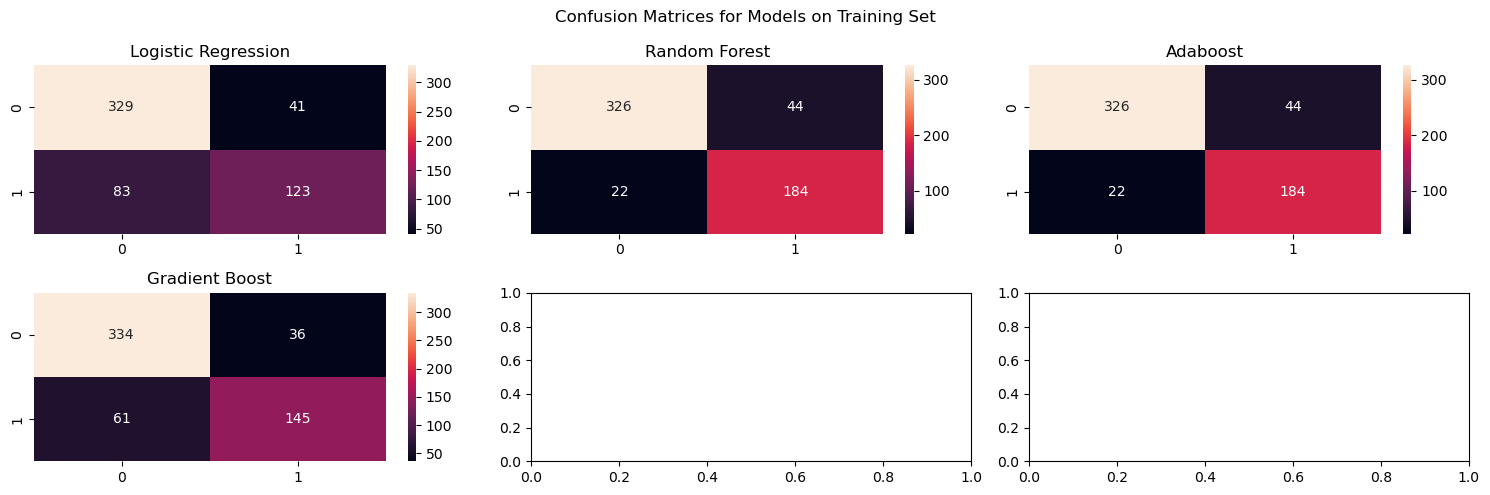

In [229]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show

Confusion Matrices for Testing Set

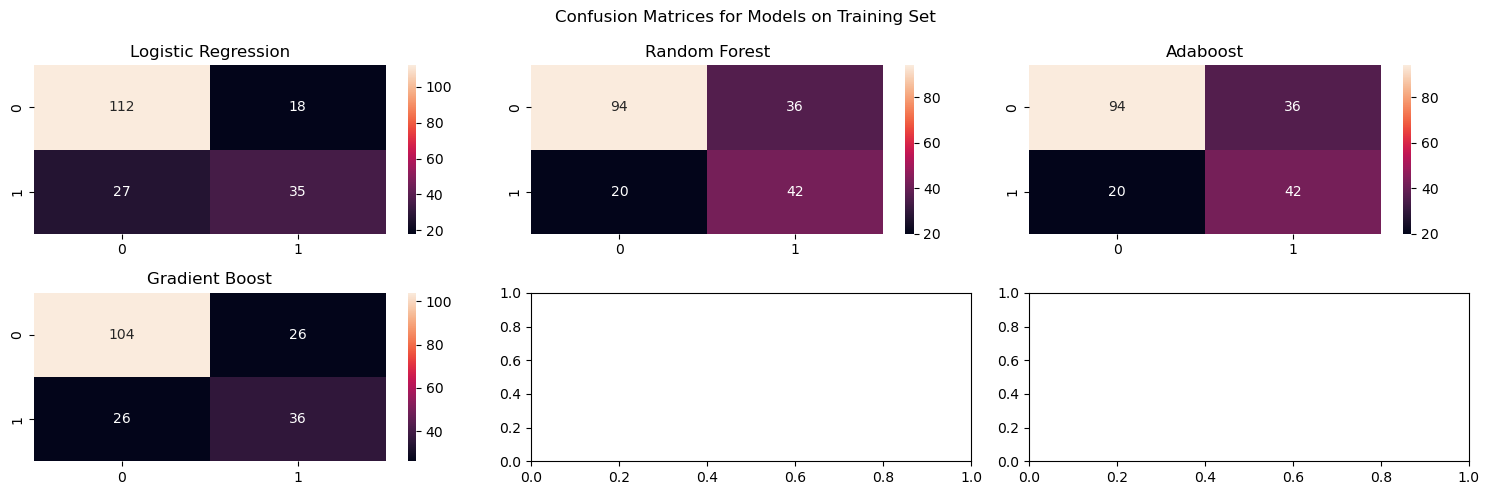

In [233]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

Random Forest: High training accuracy (83.23%) and recall (0.8389) indicate effective capture of class 1. However, its testing performance declines (accuracy: 72.96%, precision: 0.5385), suggesting potential overfitting.

Adaboost and Gradient Boost: Both models show consistent training metrics (accuracy: 81.13%, precision: 0.7980) but experience performance drops in testing (accuracy: 78.62%, recall: 0.5208), focusing on minimizing false positives.

Logistic Regression: A reliable baseline model with moderate testing performance (accuracy: 74.84%, F1 Score: 0.5556), but may underrepresent class 1.

